In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# Load the data
data = pd.read_csv('files_for_lab/customer_value_analysis.csv', index_col=0)
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.columns = data.columns.str.lower()

In [4]:
#remove spaces from _
data.columns = data.columns.str.replace(' ', '_')

In [5]:
#define x and y
y = data['customer_lifetime_value']
X = data.drop(['customer_lifetime_value'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=31)

In [7]:
#seperate numerical and categorical columns
#x_train_numerical
X_train_num = X_train.select_dtypes(include=np.number)
X_train_num.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,
DZ85842,17920,72,14,53,0,2,424.375364
UV86903,0,73,35,52,3,5,350.400000
NL59273,61486,70,2,65,0,3,334.133510
FG43850,44385,97,6,31,0,7,465.600000
XV30885,95550,116,15,75,1,1,381.570261


In [8]:
X_test_num = X_test.select_dtypes(include=np.number)
X_test_num.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,
YB49540,95017,65,5,36,0,3,324.999440
ZZ41158,28506,104,27,37,0,1,499.200000
XJ34057,67134,131,5,63,1,6,277.448968
WF34690,0,68,20,66,1,2,326.400000
DQ15807,0,80,15,83,0,1,824.487259


In [9]:
#get categorical columns
X_train_cat = X_train.select_dtypes(include=object)
X_test_cat= X_test.select_dtypes(include=object)
X_train_cat.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,
DZ85842,California,No,Basic,High School or Below,2/27/11,Retired,M,Suburban,Married,Personal Auto,Personal L1,Offer1,Branch,Four-Door Car,Medsize
UV86903,California,Yes,Basic,Bachelor,1/30/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer1,Web,Two-Door Car,Medsize
NL59273,Oregon,No,Basic,Doctor,1/21/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Medsize
FG43850,Oregon,No,Extended,High School or Below,1/14/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer4,Call Center,Four-Door Car,Small
XV30885,California,No,Basic,College,1/25/11,Employed,M,Urban,Divorced,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize


Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab.

In [11]:
#encode categorical columns with one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(X_train_cat)

OneHotEncoder(drop='first', sparse_output=False)

In [12]:
encoded_feature_names = encoder.get_feature_names_out(input_features=X_train_cat.columns)

In [13]:
#fit and transform
X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [14]:
#convert encoded data to dataframe
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded,columns=encoded_feature_names, index=X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,columns=encoded_feature_names, index=X_test_cat.index)

In [15]:
#use X_train_num  to fit power transformer
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
transformer.fit(X_train_num)


PowerTransformer()

In [16]:
#transform X_train_num and X_test_num
X_train_num_transformed = transformer.transform(X_train_num)
X_test_num_transformed = transformer.transform(X_test_num)

In [17]:
#cast transformed data to dataframe
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

In [18]:
#concat x_train_num_transformed_df and x_train_cat_encoded_df 
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)

In [19]:
X_train_new.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
Customer,,,,,,,,,,,,,,,,,,,,,
DZ85842,0.021464,-0.633251,0.048267,0.269416,-0.513111,-0.064941,0.153297,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
UV86903,-1.649407,-0.566921,1.653602,0.236349,2.009990,1.132407,-0.118964,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
NL59273,0.754866,-0.772902,-1.476582,0.653360,-0.513111,0.514553,-0.182817,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
FG43850,0.535860,0.542226,-0.840605,-0.509404,-0.513111,1.462547,0.294141,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
XV30885,1.084631,1.038549,0.142059,0.957827,1.898546,-1.149461,-0.000854,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
#concat x_test_num_transformed_df and x_test_cat_encoded_df
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)

X_test_new.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
Customer,,,,,,,,,,,,,,,,,,,,,
YB49540,1.080187,-1.168613,-0.979381,-0.321341,-0.513111,0.514553,-0.219396,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZZ41158,0.268482,0.751069,1.111327,-0.284648,-0.513111,-1.149461,0.404114,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
XJ34057,0.817410,1.309145,-0.979381,0.590890,1.898546,1.318858,-0.419268,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
WF34690,-1.649407,-0.922663,0.575934,0.684386,1.898546,-0.064941,-0.213752,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
DQ15807,-1.649407,-0.158629,0.142059,1.192998,-0.513111,-1.149461,1.311797,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#fit minmaxscaler on X_train_new
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_new)

MinMaxScaler()

In [22]:
#transform X_train_new and X_test_new
X_train_scaled = scaler.transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

In [23]:
#transform X_train_new and X_test_new to dataframe
X_train_new_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_new.columns, index=X_test_new.index)

In [24]:
#train simple linear regression model on X_train_new_scaled_df
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(X_train_new_scaled_df, y_train)

LinearRegression()

In [26]:
#predict on X_train_new_scaled_df and X_test_new_scaled_df
y_pred_train = model.predict(X_train_new_scaled_df)

In [27]:
#predict on X_test_new_scaled_df
y_pred_test = model.predict(X_test_new_scaled_df)

In [31]:
dict_results = {"Set": ["Train"]*len(y_train) + ["Test"]*len(y_test),
           "Real": y_train.tolist() + y_test.tolist(), 
           "Predicted": y_pred_train.tolist() + y_pred_test.tolist()}

results_df = pd.DataFrame(dict_results).round(2)
results_df.head()

,Set,Real,Predicted
0,Train,8105.81,6967.44
1,Train,4463.00,7572.14
2,Train,5627.30,7025.08
3,Train,7472.67,11344.95
4,Train,4595.52,8351.15


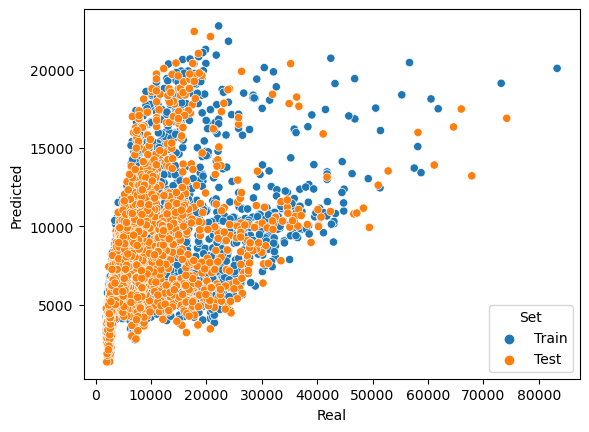

In [33]:
sns.scatterplot(data=results_df, x="Real", y="Predicted", hue="Set");

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error,mean_absolute_error

In [38]:
#Create a function that given a model prediction and real values returns a pandas dataframe w


def model_evaluation(y_real, y_pred):
    # Calculate various regression metrics
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_real, y_pred)  # Convert to percentage
    r2 = r2_score(y_real, y_pred)

    # Create a DataFrame with the calculated metrics
    metrics_df = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })

    return metrics_df

In [40]:
train_metrics_dataframe = model_evaluation(y_train, y_pred_train)
display(train_metrics_dataframe)

,Error_metric,Value
0,MAE,3.859138e+03
1,MSE,3.711047e+07
2,RMSE,6.091837e+03
3,MAPE,5.122854e-01
4,R2,2.106207e-01


In [42]:
#test
test_metrics_dataframe = model_evaluation(y_test, y_pred_test)
display(test_metrics_dataframe)

,Error_metric,Value
0,MAE,3.866428e+03
1,MSE,3.868914e+07
2,RMSE,6.220059e+03
3,MAPE,5.125897e-01
4,R2,1.881343e-01


In [43]:
#import models
#knneigbours
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [45]:
#define function to fit and predict
def train_models(list_models,X_train,y_train):
    '''
    Take a list of models, and train them
    '''
    
    for model in list_models:
        model.fit(X_train, y_train)
        
    return list_models


In [48]:
list_models_names = ['LinearRegression','KNeighborsRegressor','MLPRegressor']
list_models = [LinearRegression(),KNeighborsRegressor() , MLPRegressor() ]
models_trained = train_models(list_models,X_train_new_scaled_df, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
for name, model in zip(list_models_names,models_trained):
    print("Getting predictions for model: ",name)
    print("===========================================")
    y_train_pred = model.predict(X_train_new_scaled_df)
    y_test_pred  = model.predict(X_test_new_scaled_df)
    print("The performance of the model {} in the TRAIN set is".format(name))
    display(model_evaluation(y_train, y_train_pred))
    print("The performance of the model {} in the TEST set is".format(name))
    display(model_evaluation(y_test, y_test_pred))
    print("===========================================")
    print()

Getting predictions for model:  LinearRegression
The performance of the model LinearRegression in the TRAIN set is


,Error_metric,Value
0,MAE,3.859138e+03
1,MSE,3.711047e+07
2,RMSE,6.091837e+03
3,MAPE,5.122854e-01
4,R2,2.106207e-01


The performance of the model LinearRegression in the TEST set is


,Error_metric,Value
0,MAE,3.866428e+03
1,MSE,3.868914e+07
2,RMSE,6.220059e+03
3,MAPE,5.125897e-01
4,R2,1.881343e-01



Getting predictions for model:  KNeighborsRegressor
The performance of the model KNeighborsRegressor in the TRAIN set is


,Error_metric,Value
0,MAE,3.150717e+03
1,MSE,2.866445e+07
2,RMSE,5.353919e+03
3,MAPE,4.650442e-01
4,R2,3.902767e-01


The performance of the model KNeighborsRegressor in the TEST set is


,Error_metric,Value
0,MAE,3.862746e+03
1,MSE,4.258464e+07
2,RMSE,6.525691e+03
3,MAPE,5.862924e-01
4,R2,1.063899e-01



Getting predictions for model:  MLPRegressor
The performance of the model MLPRegressor in the TRAIN set is


,Error_metric,Value
0,MAE,4.048034e+03
1,MSE,4.030944e+07
2,RMSE,6.348972e+03
3,MAPE,6.188704e-01
4,R2,1.425753e-01


The performance of the model MLPRegressor in the TEST set is


,Error_metric,Value
0,MAE,4.027609e+03
1,MSE,4.157291e+07
2,RMSE,6.447706e+03
3,MAPE,6.243816e-01
4,R2,1.276203e-01
